# Defining a parameter

A **parameter** is one of the main building blocks in Effective Quadratures. Let $s$ be a parameter defined on a domain $\mathcal{D} \in \mathbb{R}$. The support of the domain $\mathcal{D}$ may be:

* closed $[a,b]$
* semi-infinite $(-\infty, b)` or :math:`[a, \infty)$
* infinite $(-\infty, \infty)$

Further, let us assume that this parameter is characterized by a positive weight function $\rho(s)$, which may be interpreted as the probability density function (PDF) of $s$, which readily implies that

$$
	\int_{\mathcal{D}}\rho\left(s\right)ds=1.
$$

We now demonstrate some basic functionality of this parameter. First consider the case where $\rho(s) = \mathcal{N} (0, 1)$ is a standard Gaussian distribution with a mean of 0.0 and a variance of 1.0. We then plot its PDF and cumulative density function (CDF) and demonstrate how we can generate random samples from this distribution.

In [1]:
# Check if running on colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# pip install any missing packages
if IN_COLAB:
  !pip install equadratures # for standard pip install
  #!pip install git+https://github.com/Effective-Quadratures/Effective-Quadratures.git@master # for specific branch

import numpy as np                                                                                                                                                                                      
import matplotlib.pyplot as plt
from equadratures import *

In [2]:
s = Parameter(distribution='normal', shape_parameter_A = 0.0, shape_parameter_B = 1.0, order=3)

Now for some plots; first let us plot the PDF,

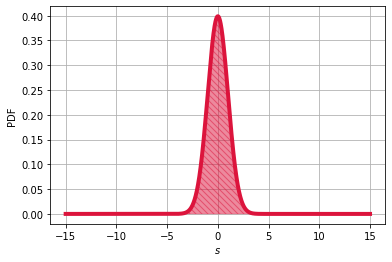

In [7]:
s_values, pdf = s.get_pdf()
s_values, cdf = s.get_cdf()
s_samples = s.get_samples(6000)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_axisbelow(True)
plt.plot(s_values, pdf, '-', c='crimson', lw=4)
plt.xlabel('$s$')
plt.ylabel('PDF')
plt.fill_between(s_values,  pdf*0.0, pdf, color="crimson" , interpolate=True, hatch="\\\\\\\\", edgecolor="grey",  linewidth=0.5,alpha=0.5)
plt.grid()
plt.show()

followed by the CDF.

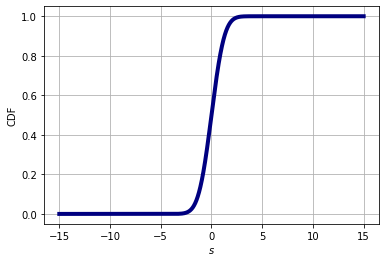

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_axisbelow(True)
plt.plot(s_values, cdf, '-', c='navy', lw=4)
plt.xlabel('$s$')
plt.ylabel('CDF')
plt.grid()
plt.show()

Now, we will use the get_samples() functionality to create a histogram.

One can repeat the above for a range of distributions. We provide a few additional definitions below. First, consider the example of a truncated Gaussian distribution,

In [10]:
s = Parameter(distribution='truncated-gaussian', lower=-1.0, upper=2., shape_parameter_A = 0.0, shape_parameter_B = 1.0, order=3)

followed by that of a custom distribution—based on user supplied data.

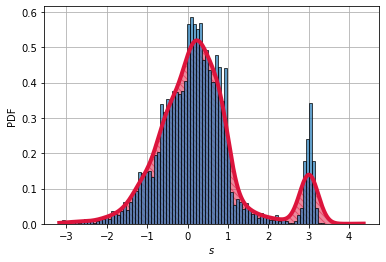

In [13]:
param1 = np.random.rand(1000)
param2 = np.random.randn(1200)
param3 = np.random.randn(1300)*0.5 - 0.2
param4 = np.random.randn(300)*0.1 + 3
data = np.hstack([param1, param2, param3, param4])
s = Parameter(distribution='custom', data=data, order=3)
s_values, pdf = s.get_pdf()
s_values, cdf = s.get_cdf()
s_samples = s.get_samples(6000)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_axisbelow(True)
plt.plot(s_values, pdf, '-', c='crimson', lw=4)
plt.fill_between(s_values,  pdf*0.0, pdf, color="crimson" , interpolate=True, hatch="\\\\\\\\", edgecolor="grey",  linewidth=0.5,alpha=0.5)
plt.hist(data, 100, density=True, facecolor=None, alpha=0.7, edgecolor='k')
plt.xlabel('$s$')
plt.ylabel('PDF')
plt.grid()
plt.show()

The full source code for this tutorial can be found [here](https://github.com/Effective-Quadratures/Effective-Quadratures/blob/master/source/_documentation/codes/tutorial_1.py).